# TASK 2

## Simple Linear Regression

## In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Dataset

In [2]:
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)

In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.keys()

Index(['Hours', 'Scores'], dtype='object')

In [6]:
data.dtypes  # Data Types

Hours     float64
Scores      int64
dtype: object

In [7]:
data.describe()  # Desciptive Statistics

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
data.isna() # Null Values

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [9]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Creating the Matrix of Features

In [10]:
X=data.iloc[:, :-1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [11]:
X.shape

(25, 1)

In [12]:
Y=data.iloc[:, 1].values
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [13]:
Y.shape

(25,)

Text(0, 0.5, 'Percentage')

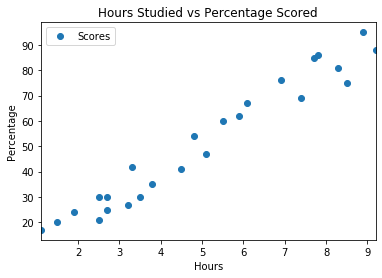

In [14]:
data.plot(x= 'Hours', y= 'Scores', style='o')
plt.title('Hours Studied vs Percentage Scored')
plt.xlabel('Hours')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

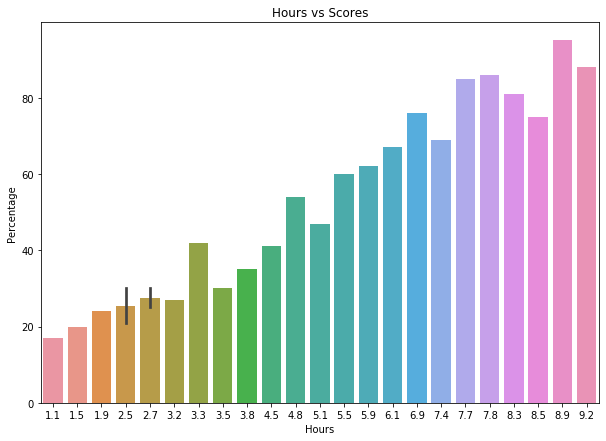

In [15]:
plt.figure(figsize=(10,7))
sns.barplot(x='Hours', y='Scores', data=data)
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Percentage')

## Applying Simple Linear Regression

### Splitting the data into Test set and Training set

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=1/3, random_state=0)

In [18]:
X_train

array([[1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [19]:
X_train.shape

(16, 1)

In [20]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9],
       [3.8],
       [1.9],
       [7.8],
       [6.9]])

In [21]:
X_test.shape

(9, 1)

In [22]:
Y_train

array([17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21, 54, 95, 41],
      dtype=int64)

In [23]:
Y_train.shape

(16,)

In [24]:
Y_test

array([20, 27, 69, 30, 62, 35, 24, 86, 76], dtype=int64)

In [25]:
Y_test.shape

(9,)

### Fitting simple linear regression to the training set

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
regressor= LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Visualising the Training set result

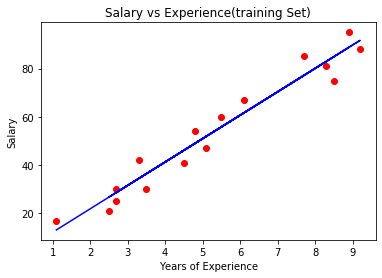

In [28]:
plt.scatter(X_train, Y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience(training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### Predicting the Test set results

In [29]:
Y_pred= regressor.predict(X_test)

In [30]:
Y_pred

array([17.04289179, 33.51695377, 74.21757747, 26.73351648, 59.68164043,
       39.33132858, 20.91914167, 78.09382734, 69.37226512])

In [31]:
Y_pred.shape

(9,)

### Visualising the Test set result

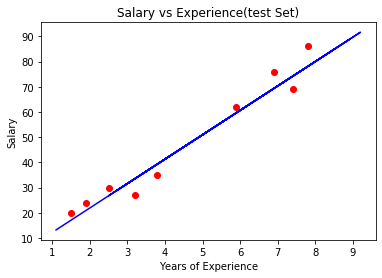

In [32]:
plt.scatter(X_test, Y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience(test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Model Evaluation

In [38]:
from sklearn import metrics

### Mean Absolute Error

In [41]:
print('MAE:',metrics.mean_absolute_error(Y_test,Y_pred))

MAE: 4.691397441397446


### Mean Squared Error

In [46]:
print('MSE:',metrics.mean_squared_error(Y_test,Y_pred))

MSE: 25.463280738222593


### Root Mean Square Error

In [42]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

RMSE: 5.046115410711748


### R squared

In [45]:
from sklearn.metrics import r2_score
print('R2:',r2_score(Y_test,Y_pred))

R2: 0.9555700801388128


## Predicting the scores when the student studies 9.25 hours in a day

In [34]:
hours = 9.25

In [35]:
hrs = np.reshape(hours,(-1, 1))
pred = regressor.predict(hrs)

In [37]:
print('Number of Hours = {}'.format(hours))
print('Predicted Scores = {:.2f} %'.format(pred[0]))

Number of Hours = 9.25
Predicted Scores = 92.15
